<a href="https://colab.research.google.com/github/Saikrish1408/FinalYearProject/blob/main/DL_FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Required Libaries and Connecting to Google Drive.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Copy of digital_marketing_campaign_dataset.csv')

In [ ]:
dataframe = dataframe.sample(n=2000)

In [ ]:
dataframe.tail(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
3575,11575,26,Male,90854,Social Media,Conversion,3419.426974,0.288517,0.161582,7,7.759081,11.272309,63,7,0,1,3627,IsConfid,ToolConfid,1
7987,15987,31,Female,24447,Referral,Consideration,2646.173197,0.165025,0.127129,6,9.200873,0.562186,87,3,4,1,218,IsConfid,ToolConfid,1
658,8658,40,Female,65588,SEO,Awareness,7497.962983,0.190590,0.146057,15,8.495331,5.331734,40,11,0,3,381,IsConfid,ToolConfid,1
7874,15874,60,Female,136180,SEO,Retention,5623.654151,0.269549,0.142952,45,4.987440,2.754244,12,14,5,2,914,IsConfid,ToolConfid,1
5330,13330,62,Female,97354,Referral,Awareness,8307.499994,0.235749,0.058739,21,3.419750,12.486258,38,4,9,4,4208,IsConfid,ToolConfid,1
933,8933,20,Female,105909,PPC,Consideration,7360.718855,0.045229,0.188793,21,8.301823,10.905814,89,17,3,5,4504,IsConfid,ToolConfid,1
3866,11866,24,Male,82679,Email,Awareness,1503.666653,0.073784,0.034327,33,7.110284,14.939951,62,17,0,7,2847,IsConfid,ToolConfid,1
5350,13350,19,Female,68536,Referral,Awareness,3973.874966,0.237159,0.041042,21,2.536429,7.548962,61,11,8,2,4060,IsConfid,ToolConfid,1
2388,10388,32,Female,115887,Social Media,Conversion,1815.173888,0.243080,0.073058,30,2.989791,10.499387,44,12,2,6,3273,IsConfid,ToolConfid,1
5035,13035,67,Female,78769,Social Media,Consideration,8022.080810,0.253020,0.108899,2,2.815068,1.164411,11,9,1,3,4777,IsConfid,ToolConfid,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 5496 to 5035
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Income               2000 non-null   int64  
 4   CampaignChannel      2000 non-null   object 
 5   CampaignType         2000 non-null   object 
 6   AdSpend              2000 non-null   float64
 7   ClickThroughRate     2000 non-null   float64
 8   ConversionRate       2000 non-null   float64
 9   WebsiteVisits        2000 non-null   int64  
 10  PagesPerVisit        2000 non-null   float64
 11  TimeOnSite           2000 non-null   float64
 12  SocialShares         2000 non-null   int64  
 13  EmailOpens           2000 non-null   int64  
 14  EmailClicks          2000 non-null   int64  
 15  PreviousPurchases    2000 non-null   int

In [ ]:
dataframe.shape

# specifies number of (data points, features)

(2000, 20)

# Data Cleaning and Preprocessing

### Feature Selection

In [ ]:
dataframe.drop(columns=["AdvertisingPlatform", "AdvertisingTool"], axis=1, inplace=True)

### Finding Missing Values

In [ ]:
dataframe.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


### Finding the Duplicates

In [ ]:
dataframe.duplicated().sum()

np.int64(0)

### Finding Garbage Values

In [ ]:
# Garbage values are present in the form of OBJECT DATA TYPE. So we gonna do the identification of Garbage value in Object based Feature.
# Slide up to know about the Data Types of Each Features.

In [ ]:
for i in dataframe.select_dtypes(include='object').columns:
  valueCount = dataframe[i].value_counts()
  print(valueCount)

Gender
Female    1213
Male       787
Name: count, dtype: int64
CampaignChannel
Referral        436
PPC             410
Social Media    400
Email           389
SEO             365
Name: count, dtype: int64
CampaignType
Conversion       522
Consideration    521
Retention        481
Awareness        476
Name: count, dtype: int64


# Error Handling

In [ ]:
dataframe.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion'],
      dtype='object')

In [ ]:
# newdataframe = pd.read_csv('/content/drive/MyDrive/Final Year Project/digital_marketing_campaign_dataset.csv')


# conversionColumn = newdataframe['Conversion']

# dataframe.insert(len(dataframe), 'Conversion', conversionColumn)

# Descriptive Analysis using EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Histogram Plot

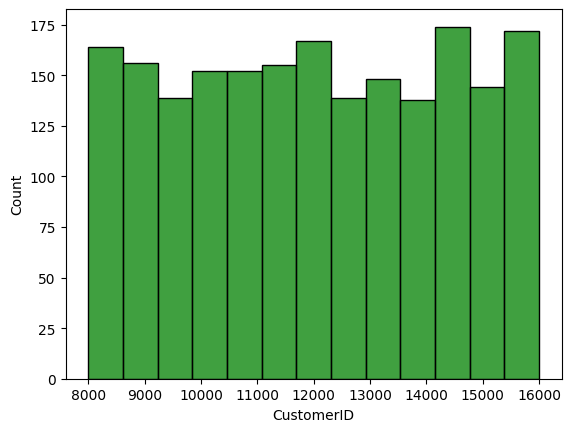

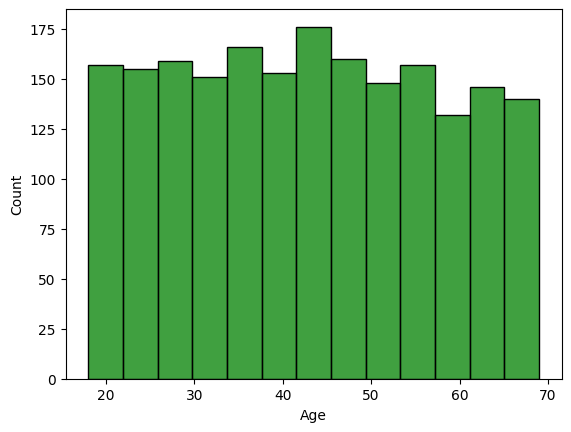

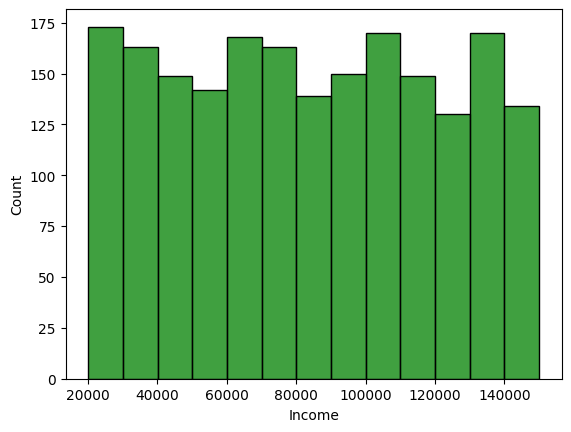

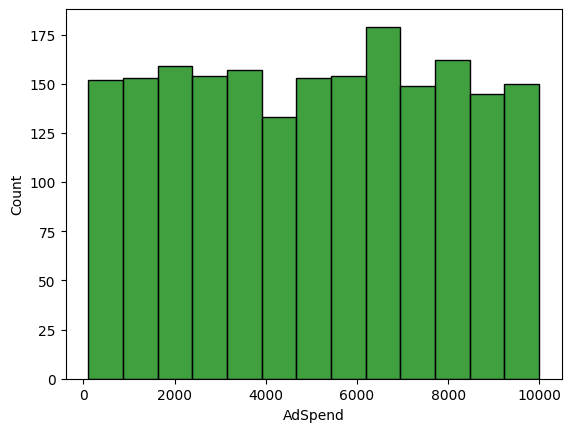

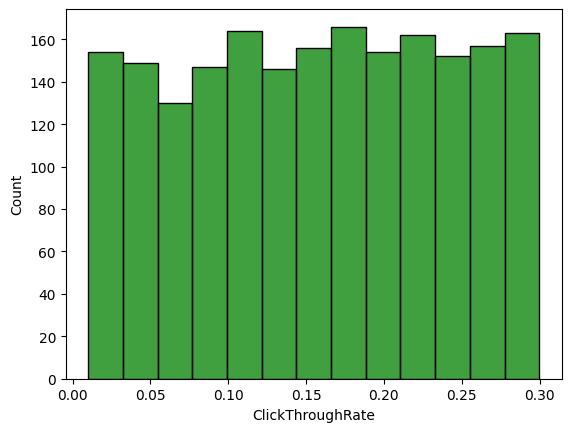

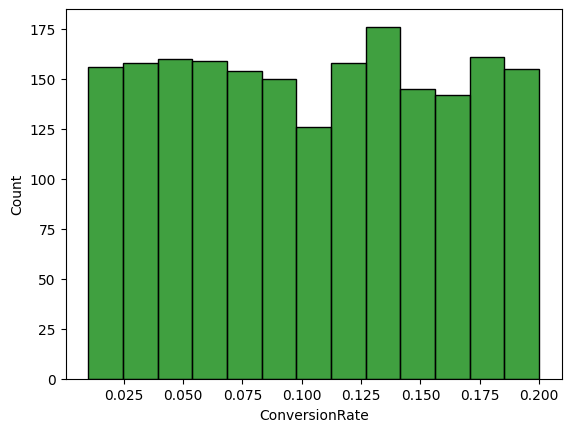

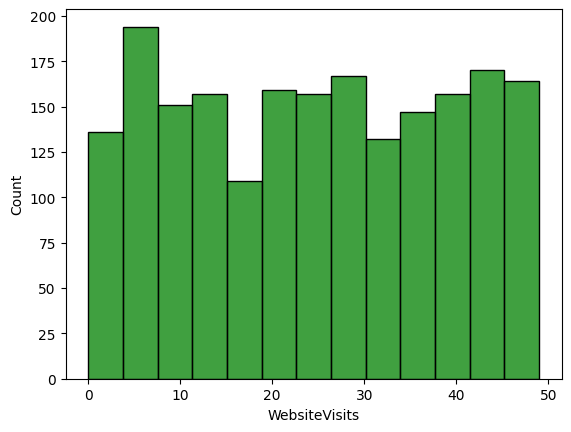

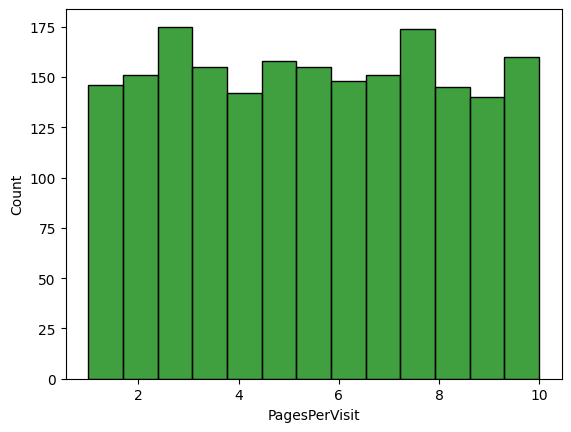

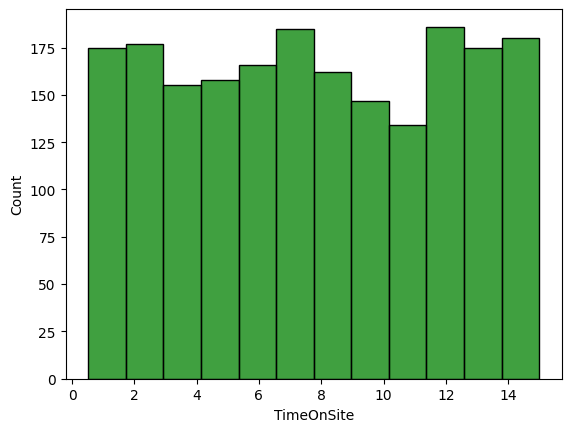

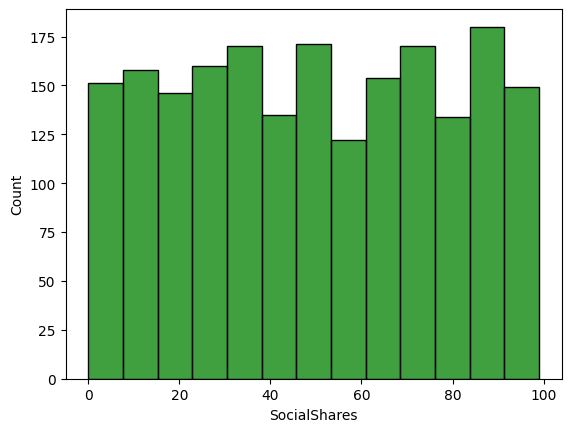

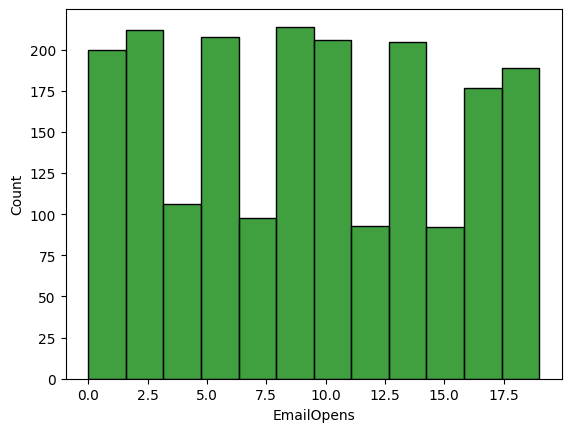

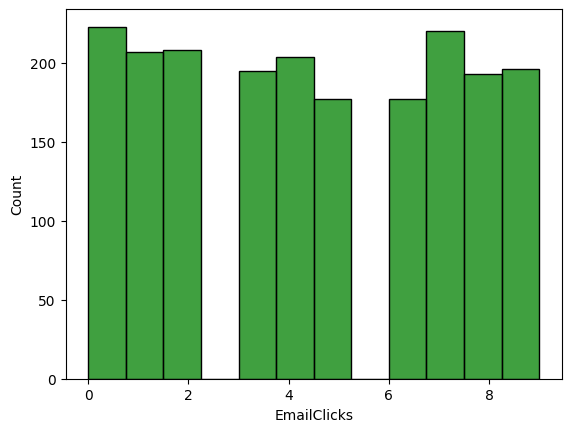

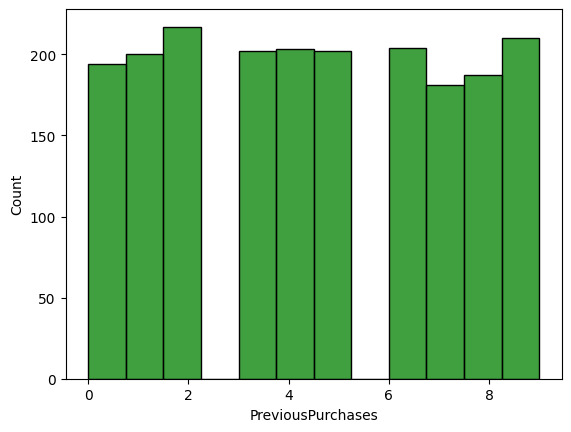

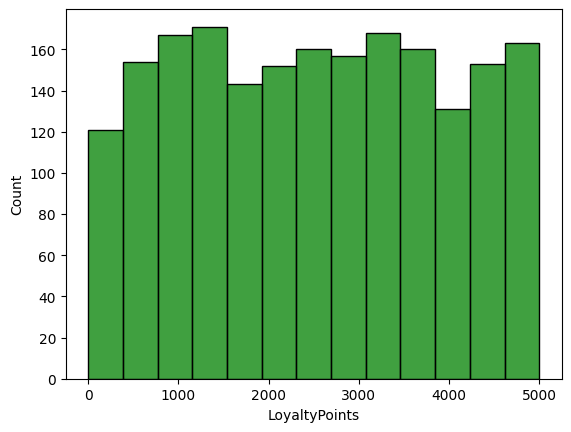

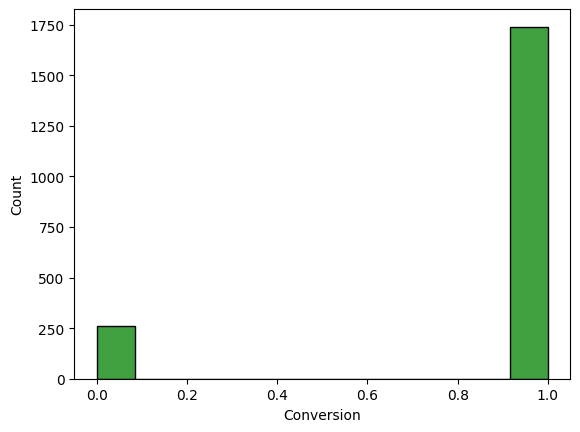

In [ ]:
for i in dataframe.select_dtypes(include='number').columns:
  sns.histplot(data=dataframe, x=i, color='green')
  plt.show()

### Scatter Plot

In [ ]:
# Used to find the Relationship between the features, like dependent and independent feature.

In [ ]:
dataframe.select_dtypes(include='number').columns

Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion'],
      dtype='object')

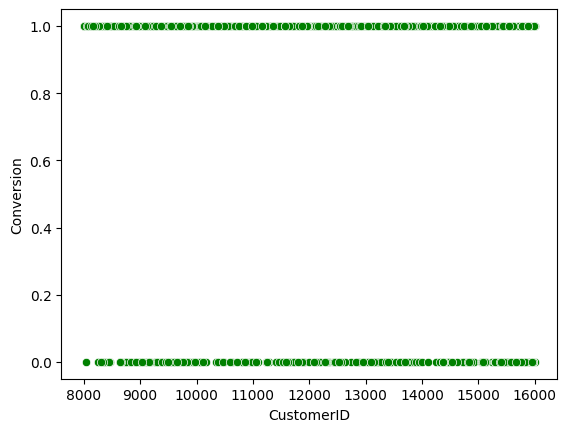

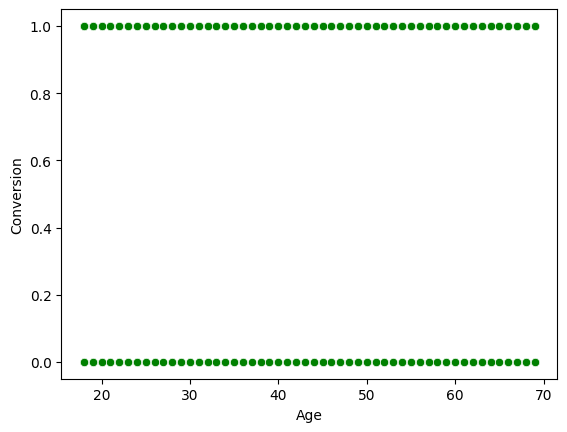

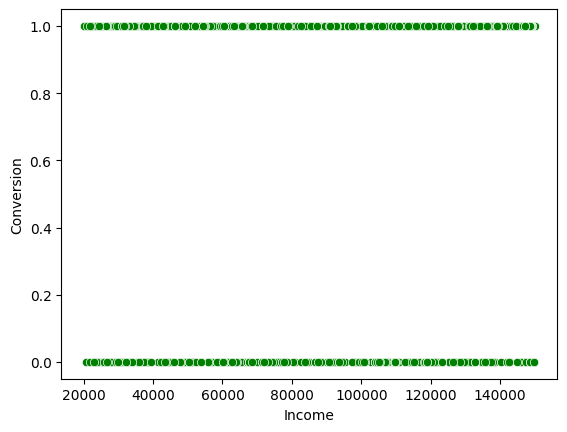

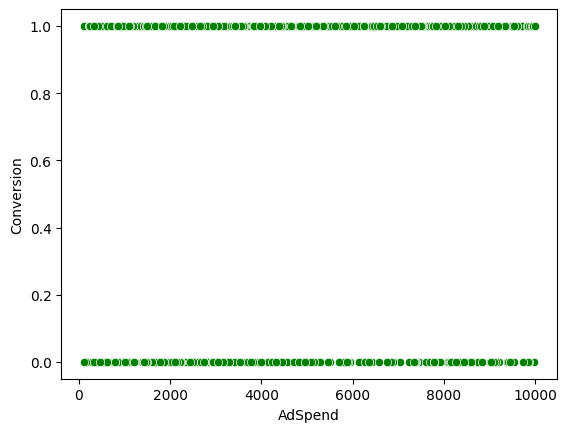

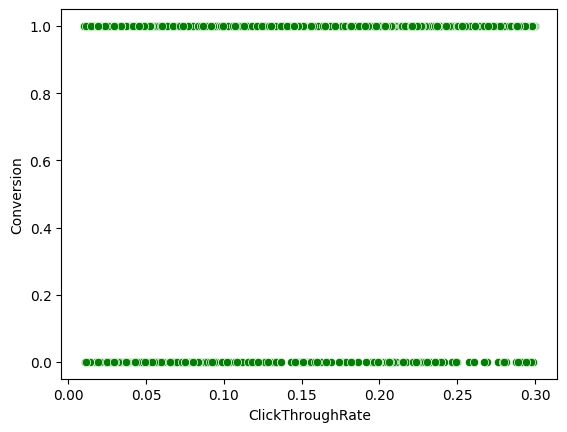

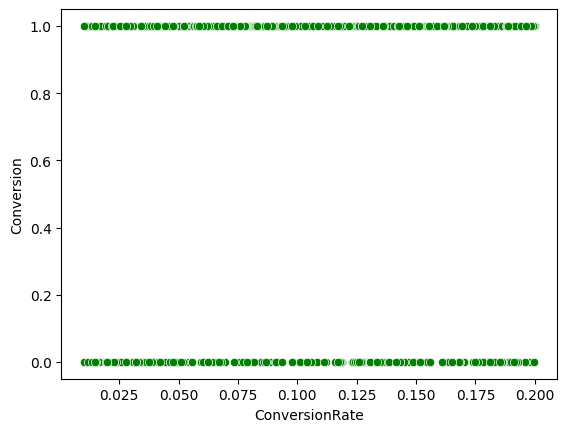

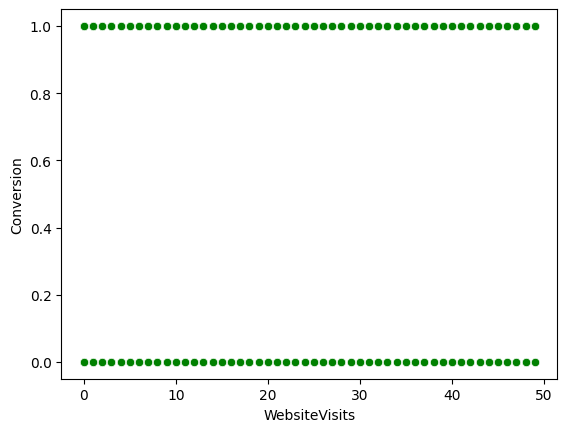

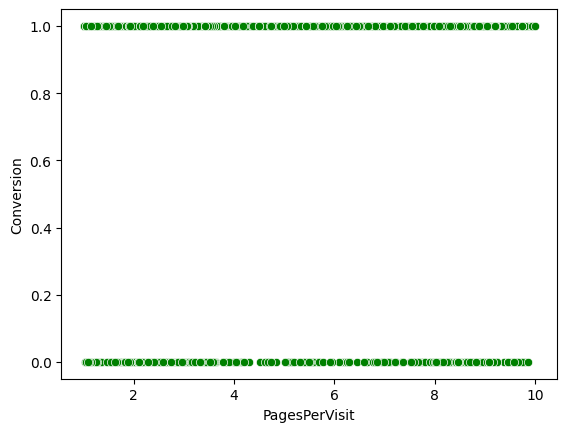

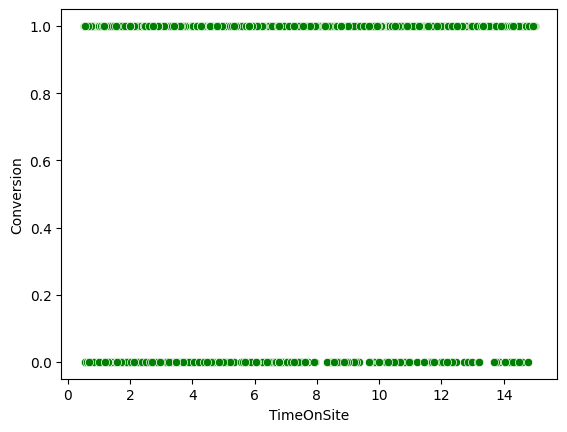

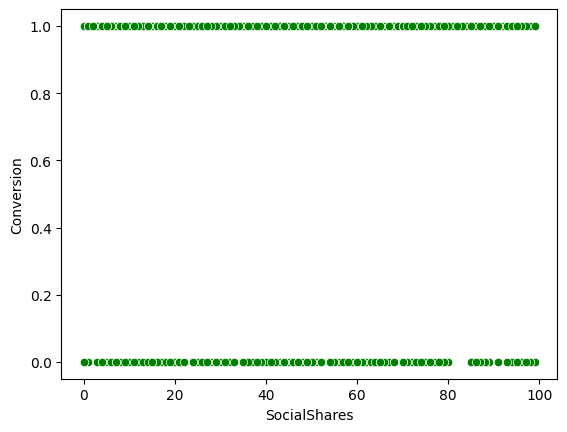

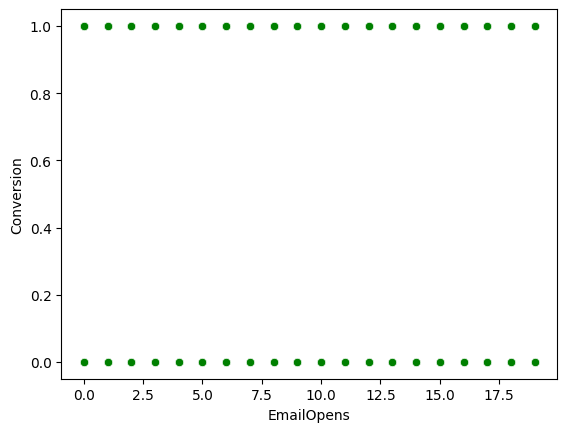

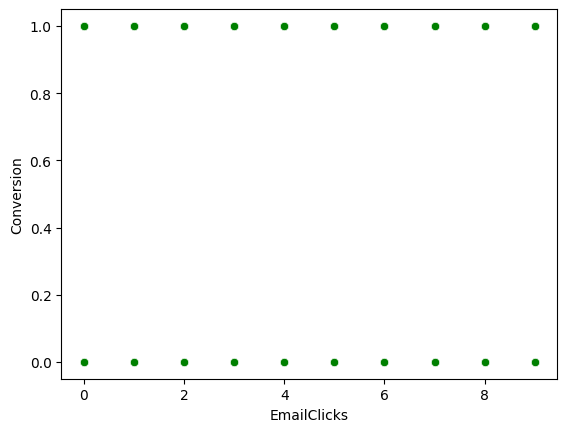

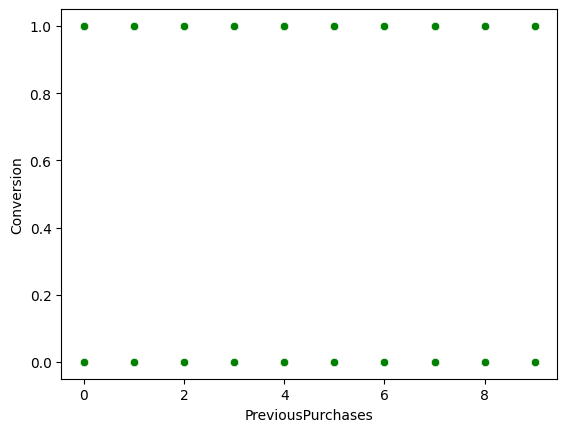

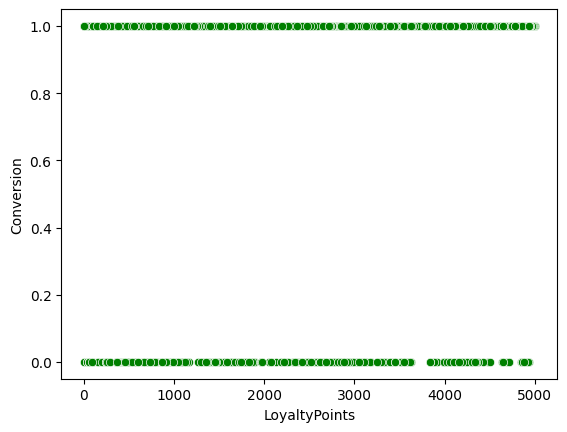

In [ ]:
for i in ['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints']:
       sns.scatterplot(data=dataframe, color='green', x=i, y='Conversion')
       plt.show()

# Handling Text based Data

In [ ]:
dataframe.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion'],
      dtype='object')

In [ ]:
!pip install nltk

## Conversion of CampaignType Feature

### One-Hot Encoding

In [ ]:
dataframe['CampaignType'].unique()

array(['Awareness', 'Conversion', 'Consideration', 'Retention'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [ ]:
ohetransform = ohe.fit_transform(dataframe[['CampaignType']])

In [ ]:
ohetransform

,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
5496,1.0,0.0,0.0,0.0
1873,1.0,0.0,0.0,0.0
4676,0.0,0.0,1.0,0.0
2325,0.0,1.0,0.0,0.0
2626,1.0,0.0,0.0,0.0
...,...,...,...,...
933,0.0,1.0,0.0,0.0
3866,1.0,0.0,0.0,0.0
5350,1.0,0.0,0.0,0.0
2388,0.0,0.0,1.0,0.0


### Concatenation of Vectors

In [ ]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns=['CampaignType'])

In [ ]:
dataframe

,CustomerID,Age,Gender,Income,CampaignChannel,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
5496,13496,32,Female,131153,Referral,9365.966828,0.262245,0.086950,27,6.562826,...,85,7,5,8,3369,1,1.0,0.0,0.0,0.0
1873,9873,63,Female,144130,PPC,5915.559840,0.100636,0.083319,15,4.562006,...,44,17,8,3,4463,1,1.0,0.0,0.0,0.0
4676,12676,21,Female,93861,Email,3023.752349,0.133312,0.175656,39,8.836889,...,11,2,5,9,2413,1,0.0,0.0,1.0,0.0
2325,10325,35,Female,48634,Referral,5811.368445,0.015481,0.148755,28,7.780726,...,10,11,6,3,3015,1,0.0,1.0,0.0,0.0
2626,10626,46,Female,125327,Referral,6116.310857,0.278097,0.137130,4,5.524987,...,68,1,1,5,661,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,8933,20,Female,105909,PPC,7360.718855,0.045229,0.188793,21,8.301823,...,89,17,3,5,4504,1,0.0,1.0,0.0,0.0
3866,11866,24,Male,82679,Email,1503.666653,0.073784,0.034327,33,7.110284,...,62,17,0,7,2847,1,1.0,0.0,0.0,0.0
5350,13350,19,Female,68536,Referral,3973.874966,0.237159,0.041042,21,2.536429,...,61,11,8,2,4060,1,1.0,0.0,0.0,0.0
2388,10388,32,Female,115887,Social Media,1815.173888,0.243080,0.073058,30,2.989791,...,44,12,2,6,3273,1,0.0,0.0,1.0,0.0


## Conversion of CampaignChannel Feature

In [ ]:
dataframe['CampaignChannel'].unique()

array(['Referral', 'PPC', 'Email', 'Social Media', 'SEO'], dtype=object)

### One Hot Encoding

In [ ]:
ohetransform = ohe.fit_transform(dataframe[['CampaignChannel']])

In [ ]:
ohetransform

,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
5496,0.0,0.0,1.0,0.0,0.0
1873,0.0,1.0,0.0,0.0,0.0
4676,1.0,0.0,0.0,0.0,0.0
2325,0.0,0.0,1.0,0.0,0.0
2626,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
933,0.0,1.0,0.0,0.0,0.0
3866,1.0,0.0,0.0,0.0,0.0
5350,0.0,0.0,1.0,0.0,0.0
2388,0.0,0.0,0.0,0.0,1.0


### Concatenation of Vectors

In [ ]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns=['CampaignChannel'])

In [ ]:
dataframe

,CustomerID,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,...,Conversion,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
5496,13496,32,Female,131153,9365.966828,0.262245,0.086950,27,6.562826,2.075051,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1873,9873,63,Female,144130,5915.559840,0.100636,0.083319,15,4.562006,10.235846,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4676,12676,21,Female,93861,3023.752349,0.133312,0.175656,39,8.836889,14.672975,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2325,10325,35,Female,48634,5811.368445,0.015481,0.148755,28,7.780726,2.847833,...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2626,10626,46,Female,125327,6116.310857,0.278097,0.137130,4,5.524987,2.516559,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,8933,20,Female,105909,7360.718855,0.045229,0.188793,21,8.301823,10.905814,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3866,11866,24,Male,82679,1503.666653,0.073784,0.034327,33,7.110284,14.939951,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5350,13350,19,Female,68536,3973.874966,0.237159,0.041042,21,2.536429,7.548962,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2388,10388,32,Female,115887,1815.173888,0.243080,0.073058,30,2.989791,10.499387,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Conversion of Gender Feature

In [ ]:
dataframe['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [ ]:
ohetransform = ohe.fit_transform(dataframe[['Gender']])

In [ ]:
ohetransform

,Gender_Female,Gender_Male
5496,1.0,0.0
1873,1.0,0.0
4676,1.0,0.0
2325,1.0,0.0
2626,1.0,0.0
...,...,...
933,1.0,0.0
3866,0.0,1.0
5350,1.0,0.0
2388,1.0,0.0


### Conversion of Vectors

In [ ]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns = ['Gender'])

In [ ]:
dataframe

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,Gender_Female,Gender_Male
5496,13496,32,131153,9365.966828,0.262245,0.086950,27,6.562826,2.075051,85,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1873,9873,63,144130,5915.559840,0.100636,0.083319,15,4.562006,10.235846,44,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4676,12676,21,93861,3023.752349,0.133312,0.175656,39,8.836889,14.672975,11,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2325,10325,35,48634,5811.368445,0.015481,0.148755,28,7.780726,2.847833,10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2626,10626,46,125327,6116.310857,0.278097,0.137130,4,5.524987,2.516559,68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,8933,20,105909,7360.718855,0.045229,0.188793,21,8.301823,10.905814,89,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3866,11866,24,82679,1503.666653,0.073784,0.034327,33,7.110284,14.939951,62,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5350,13350,19,68536,3973.874966,0.237159,0.041042,21,2.536429,7.548962,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2388,10388,32,115887,1815.173888,0.243080,0.073058,30,2.989791,10.499387,44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Finalizing the DataSet for Model Development

In [ ]:
dataframe.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,Gender_Female,Gender_Male
5496,13496,32,131153,9365.966828,0.262245,0.086950,27,6.562826,2.075051,85,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1873,9873,63,144130,5915.559840,0.100636,0.083319,15,4.562006,10.235846,44,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4676,12676,21,93861,3023.752349,0.133312,0.175656,39,8.836889,14.672975,11,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2325,10325,35,48634,5811.368445,0.015481,0.148755,28,7.780726,2.847833,10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2626,10626,46,125327,6116.310857,0.278097,0.137130,4,5.524987,2.516559,68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# The Dataset is completed it Data Preprocessing and Conversion of Vectors and now its suitable to work with the ML Algorithms.
# If the Model's accuracy is not that much good with ML Algorithms, then use DL Algorithms to make this Model to attain it's fullest potential


# Implementation of Deep Learning Algorithms

##Implementation of Recurrent Neural Networks

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


independent = dataframe.loc[:, dataframe.columns != 'Conversion']
dependent = dataframe[['Conversion']]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:


X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

model = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),


    SimpleRNN(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.1f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5551 - loss: 0.7492 - val_accuracy: 0.8763 - val_loss: 0.4799
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8456 - loss: 0.4192 - val_accuracy: 0.8763 - val_loss: 0.3997
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8803 - loss: 0.3670 - val_accuracy: 0.8763 - val_loss: 0.3603
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8603 - loss: 0.3422 - val_accuracy: 0.8800 - val_loss: 0.3397
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8769 - loss: 0.3306 - val_accuracy: 0.8863 - val_loss: 0.3222
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8755 - loss: 0.2972 - val_accuracy: 0.8813 - val_loss: 0.3154
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9074 - loss: 0.2647 - val_accuracy: 0.8863 - val_loss: 0.3071
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8866 - loss: 0.2806 - val_accuracy: 0

## Implementation of LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.1f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4585 - loss: 0.8766 - val_accuracy: 0.8783 - val_loss: 0.5696
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8307 - loss: 0.4616 - val_accuracy: 0.8783 - val_loss: 0.4936
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8732 - loss: 0.3642 - val_accuracy: 0.8783 - val_loss: 0.4598
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8765 - loss: 0.3611 - val_accuracy: 0.8783 - val_loss: 0.4292
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8648 - loss: 0.3563 - val_accuracy: 0.8783 - val_loss: 0.3995
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8649 - loss: 0.3260 - val_accuracy: 0.8783 - val_loss: 0.3728
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8767 - loss: 0.2931 - val_accuracy: 0.8783 - val_loss: 0.3514
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8679 - loss: 0.3265 - val_accuracy: 0.8783 - val_loss: 0